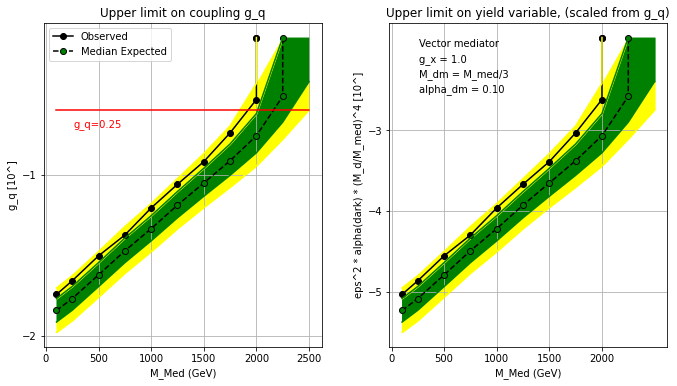

In [17]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TGraphAsymmErrors, TMultiGraph
from ROOT import gBenchmark, gStyle, gROOT
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

# Connect ROOT histogram/d demonstration file
f1 = TFile('HEPData.root')

d = gROOT.FindObject('Coupling limits on g_{q}, vector mediator')

alpha_dm = 0.1
scale_factor = (alpha_dm)*(4)*((np.e)**2)*(0.77663)/(3**4)

grObserved = d.Get('Graph1D_y1')
grMedExp = d.Get('Graph1D_y2')
grP1SD = d.Get('Graph1D_y3')
grP2SD = d.Get('Graph1D_y4')
grM1SD = d.Get('Graph1D_y5')
grM2SD = d.Get('Graph1D_y6')

x_arrays=[]
gr_arrays=[]
y_arrays=[]
y_arrays_scaled=[]

gr_arrays.append(grObserved)
gr_arrays.append(grMedExp)
gr_arrays.append(grP1SD)
gr_arrays.append(grP2SD)
gr_arrays.append(grM1SD)
gr_arrays.append(grM2SD)

largest_array = max(len(grObserved.GetX()), len(grMedExp.GetX()), \
           len(grP1SD.GetX()), len(grP2SD.GetX()), \
           len(grM1SD.GetX()), len(grM2SD.GetX()))

largest_x = max(max(grObserved.GetX()), max(grMedExp.GetX()), \
           max(grP1SD.GetX()), max(grP2SD.GetX()), \
           max(grM1SD.GetX()), max(grM2SD.GetX()))

yvals = []
for gr_array in gr_arrays:
    for y in gr_array.GetY():
        yvals.append(y)
maxY = max(yvals)

X_Observed=[max(grObserved.GetX())]*largest_array
X_MedExp=[max(grMedExp.GetX())]*largest_array
X_P1SD=[max(grP1SD.GetX())]*largest_array
X_P2SD=[max(grP2SD.GetX())]*largest_array
X_M1SD=[max(grM1SD.GetX())]*largest_array
X_M2SD=[max(grM2SD.GetX())]*largest_array

Y_Observed=[maxY]*largest_array
Y_MedExp=[maxY]*largest_array
Y_P1SD=[maxY]*largest_array
Y_P2SD=[maxY]*largest_array
Y_M1SD=[maxY]*largest_array
Y_M2SD=[maxY]*largest_array

Y_Observed_scaled=[(maxY**2)*scale_factor]*largest_array
Y_MedExp_scaled=[(maxY**2)*scale_factor]*largest_array
Y_P1SD_scaled=[(maxY**2)*scale_factor]*largest_array
Y_P2SD_scaled=[(maxY**2)*scale_factor]*largest_array
Y_M1SD_scaled=[(maxY**2)*scale_factor]*largest_array
Y_M2SD_scaled=[(maxY**2)*scale_factor]*largest_array

x_arrays.append(X_Observed)
x_arrays.append(X_MedExp)
x_arrays.append(X_P1SD)
x_arrays.append(X_P2SD)
x_arrays.append(X_M1SD)
x_arrays.append(X_M2SD)

y_arrays.append(Y_Observed)
y_arrays.append(Y_MedExp)
y_arrays.append(Y_P1SD)
y_arrays.append(Y_P2SD)
y_arrays.append(Y_M1SD)
y_arrays.append(Y_M2SD)

y_arrays_scaled.append(Y_Observed_scaled)
y_arrays_scaled.append(Y_MedExp_scaled)
y_arrays_scaled.append(Y_P1SD_scaled)
y_arrays_scaled.append(Y_P2SD_scaled)
y_arrays_scaled.append(Y_M1SD_scaled)
y_arrays_scaled.append(Y_M2SD_scaled)

for g in range(0,len(gr_arrays)):
    for i in range(0, len(gr_arrays[g].GetX())):
        x_arrays[g][i]=gr_arrays[g].GetX()[i]
        y_arrays[g][i]=gr_arrays[g].GetY()[i]
        y_arrays_scaled[g][i]=((gr_arrays[g].GetY()[i])**2)*scale_factor


# plt.plot(X_Observed,Y_Observed, 'ko-')
# plt.plot(X_MedExp,Y_MedExp, 'ko--', markerfacecolor='green')
# plt.plot(X_P1SD,Y_P1SD, color='green')
# plt.plot(X_P2SD,Y_P2SD, color='yellow')
# plt.plot(X_M1SD,Y_M1SD, color='green')
# plt.plot(X_M2SD,Y_M2SD, color='yellow')

fig, ax = plt.subplots(1,2, figsize=(10, 6))

# Non scaled plot

ax[1].plot(X_Observed,np.log10(Y_Observed_scaled), 'ko-')
ax[1].plot(X_MedExp,np.log10(Y_MedExp_scaled), 'ko--', markerfacecolor='green')
ax[1].plot(X_P1SD,np.log10(Y_P1SD_scaled), color='green')
ax[1].plot(X_P2SD,np.log10(Y_P2SD_scaled), color='yellow')
ax[1].plot(X_M1SD,np.log10(Y_M1SD_scaled), color='green')
ax[1].plot(X_M2SD,np.log10(Y_M2SD_scaled), color='yellow')

ax[1].set_yticks(np.arange(-6, -2.5, 1))

ax[1].fill_between(X_M1SD, np.log10(Y_M1SD_scaled), np.log10(Y_P1SD_scaled), color='green')
ax[1].fill_between(X_M2SD, np.log10(Y_M2SD_scaled), np.log10(Y_M1SD_scaled), color='yellow')
ax[1].fill_between(X_P1SD, np.log10(Y_P1SD_scaled), np.log10(Y_P2SD_scaled), color='yellow')

ax[1].set_ylabel('eps^2 * alpha(dark) * (M_d/M_med)^4 [10^]')
ax[1].set_title('Upper limit on yield variable, (scaled from g_q)')
ax[1].set_xticks(np.arange(0, 2500, 500))
ax[1].grid()
ax[1].set_xlabel('M_Med (GeV)')

ax[1].annotate('Vector mediator', xy=(30,300), xycoords='axes points', color='black')
ax[1].annotate('g_x = 1.0', xy=(30,285), xycoords='axes points', color='black')
ax[1].annotate('M_dm = M_med/3', xy=(30,270), xycoords='axes points', color='black')
ax[1].annotate('alpha_dm = %.2f' %alpha_dm, xy=(30,255), xycoords='axes points', color='black')


# Scaled plot

ax[0].plot(X_Observed,np.log10(Y_Observed), 'ko-')
ax[0].plot(X_MedExp,np.log10(Y_MedExp), 'ko--', markerfacecolor='green')
ax[0].plot(X_P1SD,np.log10(Y_P1SD), color='green', label = '_nolegend_')
ax[0].plot(X_P2SD,np.log10(Y_P2SD), color='yellow', label = '_nolegend_')
ax[0].plot(X_M1SD,np.log10(Y_M1SD), color='green', label = '_nolegend_')
ax[0].plot(X_M2SD,np.log10(Y_M2SD), color='yellow', label = '_nolegend_')

ax[0].set_yticks(np.arange(-2, -0, 1))

ax[0].legend([
              'Observed',
                'Median Expected'
            ])

ax[0].annotate('g_q=0.25', xy=(30,220), xycoords='axes points', color='red')

gp25=[]
for i in range(0, largest_array):
    gp25.append(np.log10(0.25))
ax[0].plot(X_M2SD, gp25, color='red', label = '_nolegend_')

ax[0].fill_between(X_M1SD, np.log10(Y_M1SD), np.log10(Y_P1SD), color='green')
ax[0].fill_between(X_M2SD, np.log10(Y_M2SD), np.log10(Y_M1SD), color='yellow')
ax[0].fill_between(X_P1SD, np.log10(Y_P1SD), np.log10(Y_P2SD), color='yellow')

ax[0].set_ylabel('g_q [10^]')
ax[0].set_title('Upper limit on coupling g_q')
ax[0].set_xlabel('M_Med (GeV)')
ax[0].grid()



# plt.gca().set_yticks(np.arange(0, 0.4, 0.1))

# plt.gca().fill_between(X_P1SD, Y_M1SD, Y_P1SD, color='green')
# plt.gca().fill_between(X_M2SD, Y_M2SD, Y_M1SD, color='yellow')
# plt.gca().fill_between(X_P2SD, Y_P2SD, Y_P1SD, color='yellow')

fig.tight_layout(pad=3.0)
# plt.figure(figsize=(8, 6))
plt.show()
# plt.savefig('figoutlog', dpi = 300)

